In [1]:
import matplotlib.pyplot as plt
# plt.style.use("seaborn")
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("../patient.csv", header=0)
df.rename(columns={0: 'Patient_id', 1: 'Patient_name', 2: 'patient_gender',3: 'patient_birth_date',4: 'patient_phone',5: 'disease_name',6:'city',7:'hospital_id'}, inplace=True)

In [4]:
df

,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id
0,187158,Harbir,Female,1924-06-30,+91 0112009318,Galactosemia,Rourkela,H1001
1,112766,Brahmdev,Female,1948-12-20,+91 1727749552,Bladder cancer,Tiruvottiyur,H1016
2,199252,Ujjawal,Male,1980-04-16,+91 8547451606,Kidney cancer,Berhampur,H1009
3,133424,Ballari,Female,1969-09-25,+91 0106026841,Suicide,Bihar Sharif,H1017
4,172579,Devnath,Female,1946-05-01,+91 1868774631,Food allergy,Bidhannagar,H1019
...,...,...,...,...,...,...,...,...
65,191132,Dipesh,Female,1949-04-01,+91 5851958964,Glaucoma,Kochi,H1016
66,105686,NaN,Male,1930-09-01,+91 7061843400,Hepatitis,Kolhapur,H1008
67,160140,Kishan,Male,1923-05-12,+91 9067652693,Rett Syndrome,Srikakulam,H1002
68,114252,NaN,Female,1927-02-26,+91 4984346995,Diabetes,Ambarnath,H1014


In [5]:
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [6]:
# Select all records that has patient_birth_date column does not match format '%Y-%m-%d'
df[df['patient_birth_date'].apply(lambda x: len(x) != 10)]

,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id


In [7]:
df['Age'] = df['patient_birth_date'].apply(age)

In [8]:
df

,Patient_id,Patient_name,patient_gender,patient_birth_date,patient_phone,disease_name,city,hospital_id,Age
0,187158,Harbir,Female,1924-06-30,+91 0112009318,Galactosemia,Rourkela,H1001,99
1,112766,Brahmdev,Female,1948-12-20,+91 1727749552,Bladder cancer,Tiruvottiyur,H1016,75
2,199252,Ujjawal,Male,1980-04-16,+91 8547451606,Kidney cancer,Berhampur,H1009,44
3,133424,Ballari,Female,1969-09-25,+91 0106026841,Suicide,Bihar Sharif,H1017,54
4,172579,Devnath,Female,1946-05-01,+91 1868774631,Food allergy,Bidhannagar,H1019,78
...,...,...,...,...,...,...,...,...,...
65,191132,Dipesh,Female,1949-04-01,+91 5851958964,Glaucoma,Kochi,H1016,75
66,105686,NaN,Male,1930-09-01,+91 7061843400,Hepatitis,Kolhapur,H1008,93
67,160140,Kishan,Male,1923-05-12,+91 9067652693,Rett Syndrome,Srikakulam,H1002,101
68,114252,NaN,Female,1927-02-26,+91 4984346995,Diabetes,Ambarnath,H1014,97


In [9]:
df['Age']

0      99
1      75
2      44
3      54
4      78
     ... 
65     75
66     93
67    101
68     97
69     51
Name: Age, Length: 70, dtype: int64

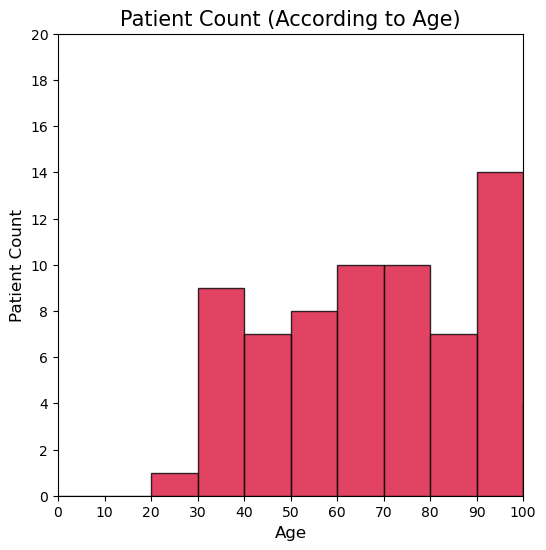

In [10]:
plt.figure(figsize=(6,6))
bins=[0,10,20,30,40,50,60,70,80,90,100,110]
a=df['Age']
plt.hist(a, bins, facecolor='crimson', alpha=0.8, edgecolor='k', linewidth=1)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Patient Count",fontsize=12)
plt.locator_params('y', nbins=12)
plt.ylim(ymin=0,ymax=20)
plt.locator_params('x', nbins=10)
plt.xlim(xmin=0,xmax=100)
plt.title("Patient Count (According to Age)",fontsize=15)
plt.savefig('processed_data_graph/PatientCount(Age).png')

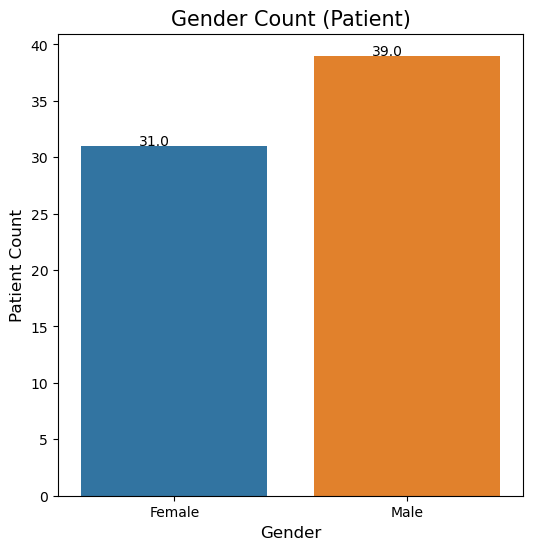

In [11]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='patient_gender',data=df)
ax.set_ylabel("Patient Count", fontsize = 12)
ax.set_xlabel("Gender", fontsize = 12)
ax.set_title("Gender Count (Patient)", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/GenderCount(Patient).png')

In [13]:
js=pd.read_json('../claims.json')

In [14]:
js

,claim_id,patient_id,disease_name,SUB_ID,Claim_Or_Rejected,claim_type,claim_amount,claim_date
0,0,187158,Galactosemia,SUBID1000,N,claims of value,79874,1949-03-14
1,1,112766,Bladder cancer,SUBID10001,N,claims of policy,151142,1970-03-16
2,2,199252,Kidney cancer,SUBID10002,N,claims of value,59924,2008-02-03
3,3,133424,Suicide,SUBID10003,N,claims of fact,143120,1995-02-08
4,4,172579,Food allergy,SUBID10004,Y,claims of value,168634,1967-05-23
...,...,...,...,...,...,...,...,...
65,65,191132,Glaucoma,SUBID1065,Y,claims of policy,81980,1969-05-31
66,66,105686,Hepatitis,SUBID10066,N,claims of fact,13667,1957-09-12
67,67,160140,Rett Syndrome,SUBID1067,N,claims of value,109433,1944-12-25
68,68,114252,Diabetes,SUBID10068,N,claims of policy,152901,1948-02-13


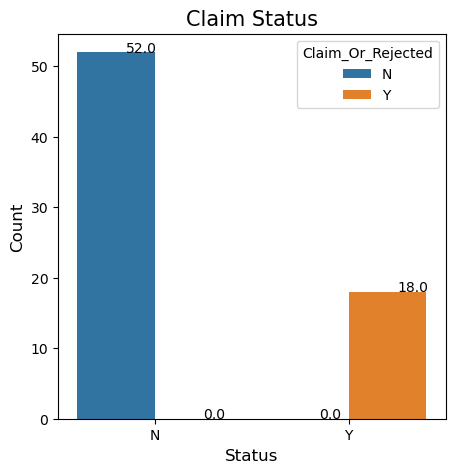

In [15]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Claim_Or_Rejected',data=js,hue='Claim_Or_Rejected')
ax.set_ylabel("Count",fontsize=12)
ax.set_xlabel("Status", fontsize=12)
ax.set_title("Claim Status",fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/ClaimStatus.png')

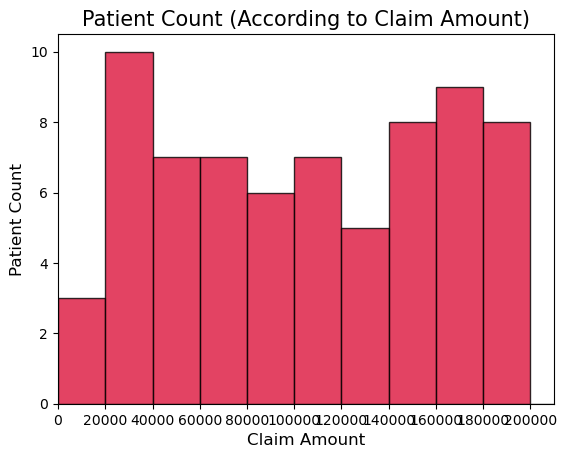

In [16]:
bins=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000]
a=js['claim_amount']
plt.hist(a, bins, facecolor='crimson', alpha=0.8, edgecolor='k', linewidth=1)
plt.xlabel("Claim Amount",fontsize=12)
plt.ylabel("Patient Count",fontsize=12)
plt.locator_params('x', nbins=12)
plt.xlim(xmin=0,xmax=210000)
plt.title("Patient Count (According to Claim Amount)",fontsize=15)
plt.savefig('processed_data_graph/Patient_count(claimAmt).png')

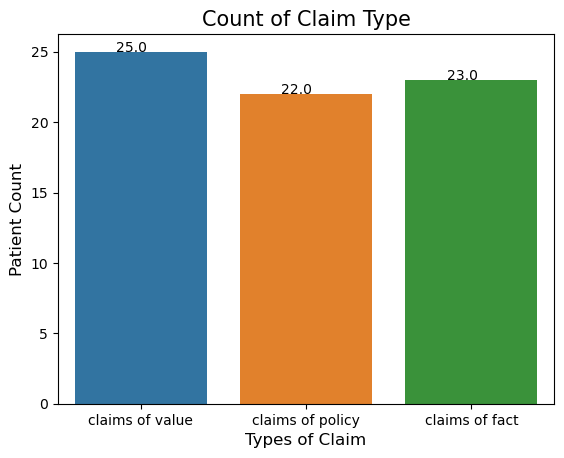

In [17]:
ax=sns.countplot(x='claim_type',data=js)
ax.set_ylabel("Patient Count",fontsize=12)
ax.set_xlabel("Types of Claim", fontsize=12)
ax.set_title("Count of Claim Type",fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/CountofClaimType.png')

In [19]:
df1=pd.read_csv('../subscriber.csv')

In [20]:
df1

,sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date
0,SUBID10000,Harbir,Vishwakarma,Baria Marg,1924-06-30,Female,+91 0112009318,India,Rourkela,767058,S107,Y,1944-06-30,1954-01-14
1,SUBID10001,Brahmdev,Sonkar,Lala Marg,1948-12-20,Female,+91 1727749552,India,Tiruvottiyur,34639,S105,Y,1968-12-20,1970-05-16
2,SUBID10002,Ujjawal,Devi,Mammen Zila,1980-04-16,Male,+91 8547451606,India,Berhampur,914455,S106,N,2000-04-16,2008-05-04
3,SUBID10003,Ballari,Mishra,Sahni Zila,1969-09-25,Female,+91 0106026841,India,Bihar Sharif,91481,S104,N,1989-09-25,1995-06-05
4,SUBID10004,Devnath,Srivastav,Magar Zila,1946-05-01,Female,+91 1868774631,India,Bidhannagar,531742,S110,N,1966-05-01,1970-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SUBID10095,Ekaaksh,Rai,Bansal Ganj,1933-12-02,Others,NaN,India,Pimpri-Chinchwad,158186,S107,N,1953-12-02,1960-07-29
96,SUBID10096,Chanak,Sonkar,Kaur,1959-04-07,Others,+91 7284540687,India,Raurkela Industrial Township,899590,S101,Y,1979-04-07,1986-03-07
97,SUBID10097,NaN,Sonkar,Rana Ganj,1940-02-04,Others,+91 8908240160,India,Mira-Bhayandar,896586,S107,Y,1960-02-04,1965-01-12
98,SUBID1098,Pushkar,Kumar,Sodhi Zila,1934-10-05,Others,+91 8956368286,India,Korba,910732,S107,Y,1954-10-05,1961-04-05


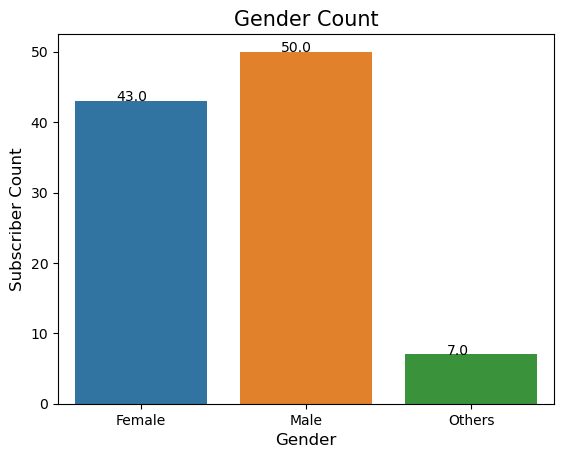

In [21]:
ax=sns.countplot(x='Gender',data=df1)
ax.set_ylabel("Subscriber Count", fontsize = 12)
ax.set_xlabel("Gender", fontsize = 12)
ax.set_title("Gender Count", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
plt.savefig('processed_data_graph/Subs_GenderCount.png')

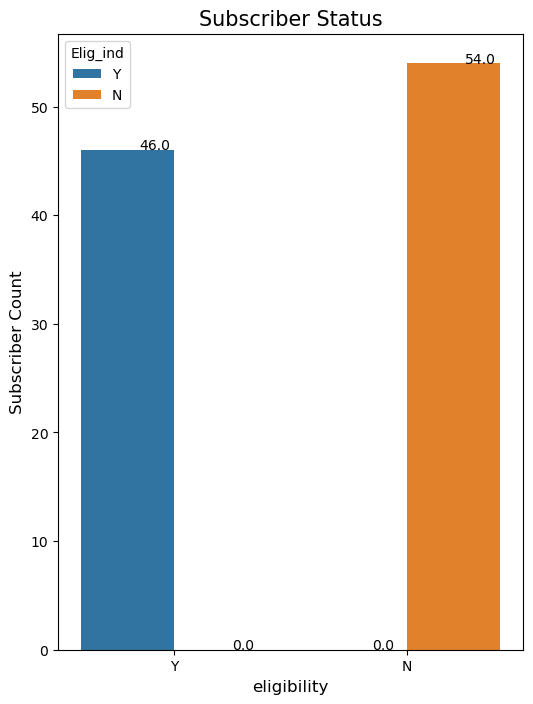

In [22]:
plt.figure(figsize = (6,8))
ax=sns.countplot(x='Elig_ind',data=df1,hue='Elig_ind')
ax.set_ylabel("Subscriber Count", fontsize = 12)
ax.set_xlabel("eligibility", fontsize = 12)
ax.set_title("Subscriber Status", fontsize=15)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.savefig('processed_data_graph/Subs_Status.png')

In [26]:
def age1(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [25]:
# Get all records that df1['Birth_date'] column does not match format '%Y-%m-%d'
df1[df1['Birth_date'].apply(lambda x: len(x) != 10)]

,sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date


In [27]:
df1['Age'] = df1['Birth_date'].apply(age1)

In [28]:
df1

,sub _id,first_name,last_name,Street,Birth_date,Gender,Phone,Country,City,Zip Code,Subgrp_id,Elig_ind,eff_date,term_date,Age
0,SUBID10000,Harbir,Vishwakarma,Baria Marg,1924-06-30,Female,+91 0112009318,India,Rourkela,767058,S107,Y,1944-06-30,1954-01-14,99
1,SUBID10001,Brahmdev,Sonkar,Lala Marg,1948-12-20,Female,+91 1727749552,India,Tiruvottiyur,34639,S105,Y,1968-12-20,1970-05-16,75
2,SUBID10002,Ujjawal,Devi,Mammen Zila,1980-04-16,Male,+91 8547451606,India,Berhampur,914455,S106,N,2000-04-16,2008-05-04,44
3,SUBID10003,Ballari,Mishra,Sahni Zila,1969-09-25,Female,+91 0106026841,India,Bihar Sharif,91481,S104,N,1989-09-25,1995-06-05,54
4,SUBID10004,Devnath,Srivastav,Magar Zila,1946-05-01,Female,+91 1868774631,India,Bidhannagar,531742,S110,N,1966-05-01,1970-12-09,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SUBID10095,Ekaaksh,Rai,Bansal Ganj,1933-12-02,Others,NaN,India,Pimpri-Chinchwad,158186,S107,N,1953-12-02,1960-07-29,90
96,SUBID10096,Chanak,Sonkar,Kaur,1959-04-07,Others,+91 7284540687,India,Raurkela Industrial Township,899590,S101,Y,1979-04-07,1986-03-07,65
97,SUBID10097,NaN,Sonkar,Rana Ganj,1940-02-04,Others,+91 8908240160,India,Mira-Bhayandar,896586,S107,Y,1960-02-04,1965-01-12,84
98,SUBID1098,Pushkar,Kumar,Sodhi Zila,1934-10-05,Others,+91 8956368286,India,Korba,910732,S107,Y,1954-10-05,1961-04-05,89


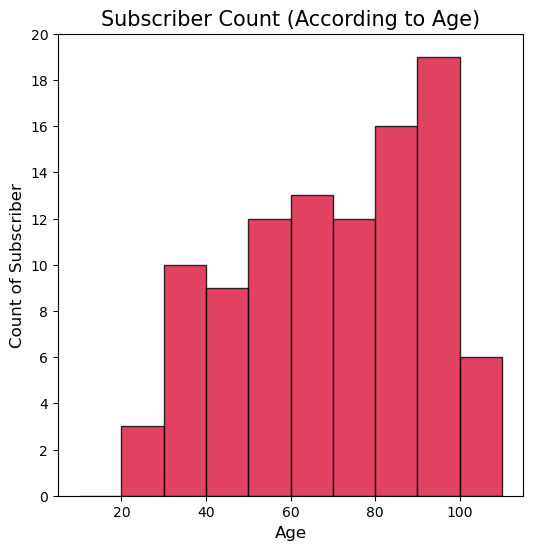

In [29]:
plt.figure(figsize=(6,6))
bins=[10,20,30,40,50,60,70,80,90,100,110]
a=df1['Age']
plt.hist(a, bins, facecolor='crimson', alpha=0.8, edgecolor='k', linewidth=1)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Count of Subscriber",fontsize=12)
plt.locator_params('y', nbins=12)
plt.ylim(ymin=0,ymax=20)
plt.title("Subscriber Count (According to Age)",fontsize=15)
plt.savefig('processed_data_graph/Subs_Count(age).png')